In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading Data

In [2]:
avo = pd.read_csv('avocado.csv', index_col = 0)

In [3]:
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avo['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [5]:
avo['type'].unique()

array(['conventional', 'organic'], dtype=object)

Splitting Data

In [6]:
avo.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
features = ['Total Volume', '4046', '4225', '4770','Total Bags','type','region']

In [8]:
X = avo[features]

In [9]:
y = avo['AveragePrice']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Preprocessing // PipeLine

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [13]:
categorical_col = [cnam for cnam in X_train.columns if X_train[cnam].nunique()<10 and X_train[cnam].dtype == 'object']

In [14]:
numerical_col = [cnam for cnam in X_train.columns if X_train[cnam].dtype in ['int64','float64']]

In [15]:
numerical_transform = SimpleImputer(strategy='constant')

In [16]:
categorical_transform = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy = 'most_frequent')),
        ('one_hot', OneHotEncoder(handle_unknown = 'ignore', sparse = False))
        
    ]
)

In [17]:
preprocess = ColumnTransformer(
    transformers= [
        ('cat', categorical_transform, categorical_col),
        ('num', numerical_transform, numerical_col)
    ]
)

Processing + evaluating

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
def score(n, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    my_pipeline = Pipeline(steps = [('preprocessor', preprocess),('model', model)])
    my_pipeline.fit(X_train, y_train)
    pred = my_pipeline.predict(X_test)
    mae = mean_absolute_error(pred, y_test)
    return mae

In [21]:
for n in [5,10,50,100,500]:
    my_model = score(n, X_train, X_test, y_train, y_test)
    print(n, ' : ', my_model)

5  :  0.17049150684931508
10  :  0.1634145205479452
50  :  0.15713824657534245
100  :  0.1564412876712329
500  :  0.1560013479452056


Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
my_pipeline = Pipeline(steps = [('preprocessor', preprocess),('model', model)])

In [24]:
score = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring= 'neg_mean_absolute_error')

In [25]:
print(score.mean())

0.2480603348688512


# Data Visualization

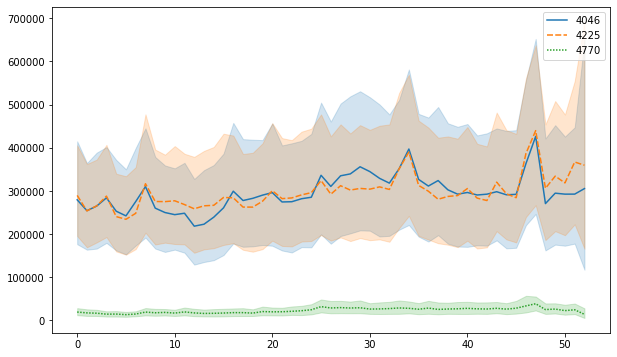

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(data = avo[['4046', '4225', '4770']])

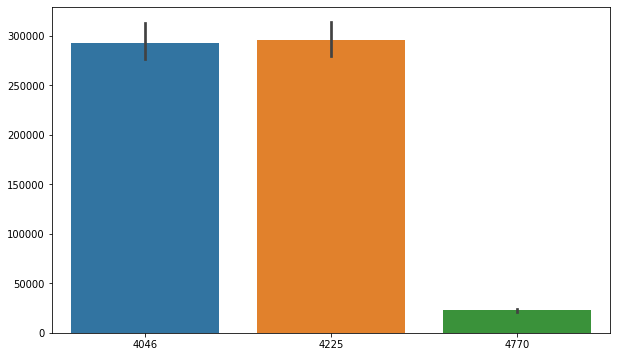

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data = avo[['4046', '4225', '4770']])

In [28]:
plt.figure(figsize=(10,6))
#sns.heatmap(data = avo)

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

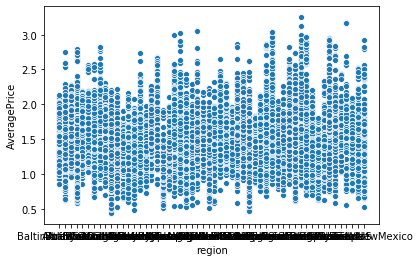

In [29]:
sns.scatterplot(x='region',y='AveragePrice',data=avo)

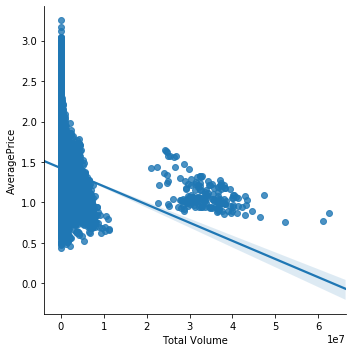

In [30]:
sns.lmplot(x='Total Volume',y='AveragePrice',data=avo)

In [31]:
####?????sns.swarmplot(x='Total Volume',y='AveragePrice',data=avo)

In [35]:
#######??????sns.kdeplot(data = avo['type'])

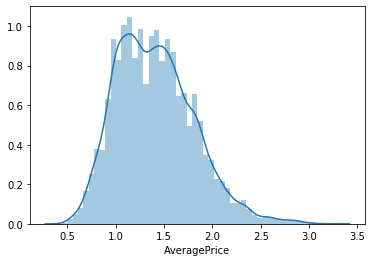

In [36]:
sns.distplot(a = avo['AveragePrice'])

In [1]:
# This comment is made for testing git repository
# Have fun